# SF GoBike Data Exploration - Relationship Between Duration, User Type, and Gender
## by Gbenga Sorinola

## Investigation Overview


In this presentation, I mainly want to look at the relationship between duration, user type, and gender.


## Dataset Overview
The initial dataset consist of 183412 gobike rides with 16 variables. 8,460 bike rides were removed for missing values and I dropped 4 variables that were not needed for this project. Additionally, I removed member ages over 98 years as they were improbable.


In [20]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [21]:
# load the dataset and output the first 10 rows
gobike = pd.read_csv('201902-fordgobike-tripdata.csv')


In [22]:
# drop columns we don't need
drop_col = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude']
gobike = gobike.drop(drop_col, axis = 1)

# drop missing values
gobike = gobike.dropna()

# change variables to the right datatype
gobike[['start_station_id', 'end_station_id', 'member_birth_year']] = gobike[['start_station_id', 'end_station_id', 'member_birth_year']].astype('int')
gobike['start_time'] = pd.to_datetime(gobike['start_time'])
gobike['end_time'] = pd.to_datetime(gobike['end_time'])
gobike[['user_type', 'member_gender', 'bike_share_for_all_trip']] = gobike[['user_type', 'member_gender', 'bike_share_for_all_trip']].astype('category')
gobike.info()

# create member_age variable
gobike['member_age'] = 2019 - gobike['member_birth_year']
# drop birth year
gobike = gobike.drop('member_birth_year', axis = 1)
# remove ages above 98
gobike = gobike[gobike['member_age'] <= 98]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int64         
 4   start_station_name       174952 non-null  object        
 5   end_station_id           174952 non-null  int64         
 6   end_station_name         174952 non-null  object        
 7   bike_id                  174952 non-null  int64         
 8   user_type                174952 non-null  category      
 9   member_birth_year        174952 non-null  int64         
 10  member_gender            174952 non-null  category      
 11  bike_share_for_all_trip  174952 non-null  category      
dtypes: category(3), 

## Duration vs. User Type

The lower quartile of the customer user type is on the same level as the median of the subscriber user type.

Based of the median, customers (unsubscribed users) take longer trips than subscribers. So, while most of the top ten longest trips were made by subscribers, overall, customers take longer trips. One assumption we can make is that the customers are made up of tourists or people going on sight-seeing trips. It should be the latter as this dataset is for February, which is not a tourism season.

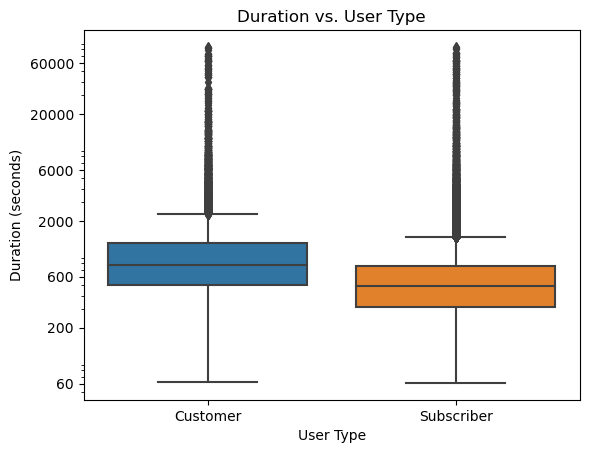

In [17]:
# set the ticks and labels
ticks = [60, 200, 600, 2000, 6000, 20000, 60000]
labels = ['{}'.format(v) for v in ticks]

# boxplot of duration and user_type
sb.boxplot(data = gobike, x = 'user_type', y = 'duration_sec');

# title
plt.title('Duration vs. User Type')

# x-axis label
plt.xlabel('User Type')

# y-axis scale transformation and labels
plt.ylabel('Duration (seconds)')
plt.yscale('log');
plt.yticks(ticks, labels);

## Avg. Duration vs. Gender

On an average, the Other gender and Female gender take trips of longer duration than Male. 

This is an interesting insight as it can help bike rental services determine who to target. However, it will be best to know what constitute the "Other" gender.

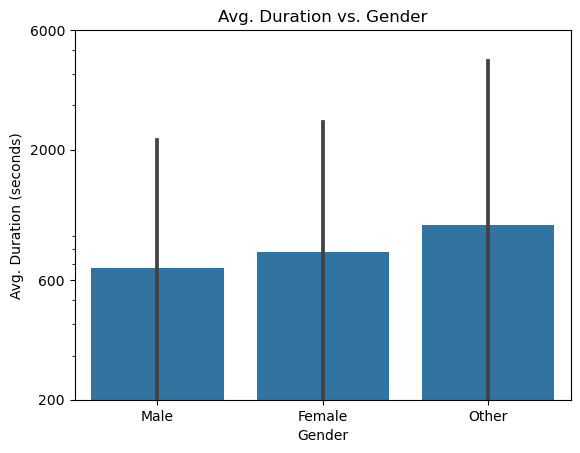

In [13]:
# set the ticks and labels
ticks = [200, 600, 2000, 6000]
labels = ['{}'.format(v) for v in ticks]
base_color = sb.color_palette()[0]

# barplot of duration vs. gender
sb.barplot(data = gobike, x = 'member_gender', y = gobike['duration_sec'], 
           ci = 'sd', color = base_color, order = ['Male', 'Female', 'Other']);

# title
plt.title('Avg. Duration vs. Gender')

# x-axis label
plt.xlabel('Gender')

# y-axis scale transformation and labels
plt.yscale('log');
plt.yticks(ticks, labels);
plt.ylabel('Avg. Duration (seconds)');

## Duration and Gender By User Type

Customers across all gender go on longer trips than Subscribers. But more Other and Female customers go on longer trips than Male customers. We see the same trend for subscribers, where Other and Female subscribers go on longer trips than Male subscribers.


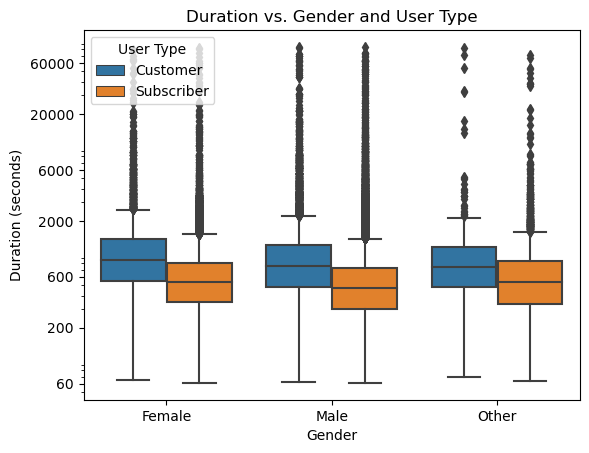

In [18]:
ticks = [60, 200, 600, 2000, 6000, 20000, 60000]
labels = ['{}'.format(v) for v in ticks]

sb.boxplot(data = gobike, x = 'member_gender', y = 'duration_sec', hue = 'user_type');
plt.title('Duration vs. Gender and User Type')

plt.xlabel('Gender')

plt.yscale('log');
plt.yticks(ticks, labels)
plt.ylabel('Duration (seconds)')
plt.legend(title = 'User Type', loc = 'upper left');

## Age and Gender By Bike Sharing

The age upper-quartile of females is higher than the other genders, while the median age of males is the lowest (26 years) for those that opt for bike sharing, Other is the highest (33 years). This reveals that users that opt for bike sharing are mainly young male and female, with older people of other gender.

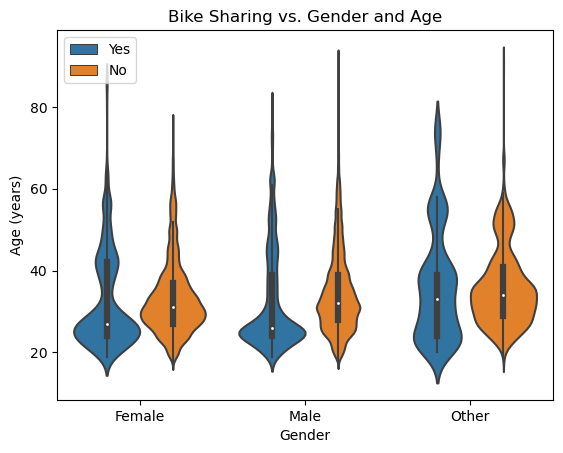

In [23]:
# create a barplot of duration, day, and user type
sb.violinplot(data = gobike, x = 'member_gender', y = 'member_age', hue = 'bike_share_for_all_trip', hue_order = ['Yes', 'No']);
plt.title('Bike Sharing vs. Gender and Age')

plt.xlabel('Gender')
plt.ylabel('Age (years)');

plt.legend(loc = 2);

The most frequent route is between Berry St at 4th St and San Franscisco Ferry Building (Harry Bridges Plaza). We see that the start stations and end stations are almost similar. 

A quick search on Google shows why these stations are quite popular. They are some of the major thoroughfares in San Francisco. 

Market St at 10th St has always been a major transit artery for the city of San Francisco since it was first laid out in 1839. It is home to the Market Street Subway, which carries Muni Metro and  Bay Area Rapid Transit (BART). San Francisco Caltrain stations are a train system that serve a significant number of the city's population each day. San Francisco Ferry Building (Harry Bridges Plaza) is a hotspot for locals and tourists alike. Montgomery St BART Station (Market St at 2nd St) is close to Market Street and have BART and Muni Metro Rapid transit stations. 

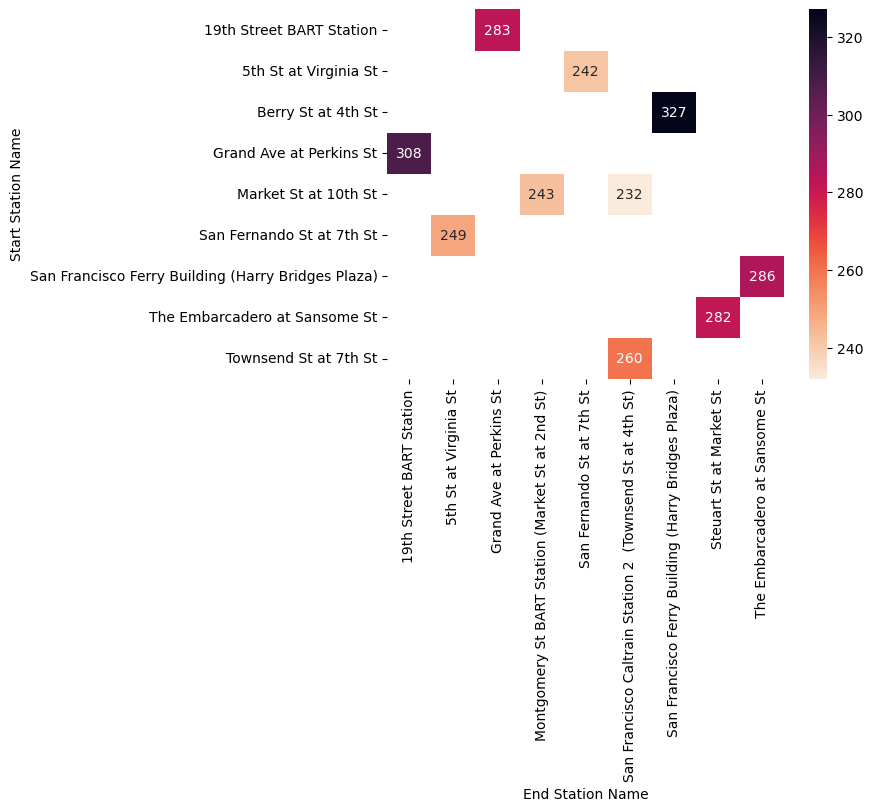

In [24]:
start_end_station = gobike.groupby(['start_station_name', 'end_station_name']).size().sort_values(ascending = False)[:10]
start_end_station = start_end_station.reset_index(name = 'count')
start_end_station = start_end_station.pivot(index = 'start_station_name', columns = 'end_station_name', values = 'count')

# create a heatmap 
sb.heatmap(start_end_station, fmt = '.0f', annot = True, cmap = 'rocket_r');
plt.xlabel('End Station Name')
plt.ylabel('Start Station Name');

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 869426 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
